In [1]:
from __future__ import annotations

import json
import typing as T
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_raw = pd.read_csv("data/train999.csv")
train_raw

,id,configuration_item_id,ts,__insert_ts,keys,values
0,1684,30928,2024-06-29 03:00:01,2024-06-29 06:24:05,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '3', '2.3', '46.7', '41.4', '0', '132',..."
1,862,30928,2024-06-10 11:00:00,2024-06-10 13:42:48,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '2', '2.5', '29.4', '32.1', '0', '351',..."
2,1992,24445,2024-05-26 22:00:02,2024-05-26 22:56:03,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '2', '0.5', '70.8', '21.8', '0', '121',..."
3,889,30928,2024-06-11 01:00:59,2024-06-11 03:56:49,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '3', '2.5', '61.6', '25.7', '0', '63', ..."
4,1362,30928,2024-06-22 02:00:00,2024-06-22 05:25:38,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '4', '2.8', '61.5', '27.5', '0', '185',..."
...,...,...,...,...,...,...
1935,1638,30928,2024-06-28 02:30:01,2024-06-28 05:23:15,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '2', '2.1', '58.7', '39.1', '0', '82', ..."
1936,1095,30928,2024-06-15 23:30:01,2024-06-16 02:12:08,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '3', '0.5', '60.7', '27', '0', '205', '..."
1937,1130,30928,2024-06-16 18:30:00,2024-06-16 21:08:04,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '3', '1.2', '90.1', '26', '0', '231', '..."
1938,1294,30928,2024-06-20 15:30:02,2024-06-20 18:11:05,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '2', '0.6', '58.6', '22.7', '0', '184',..."


In [3]:
def parse_values(x: pd.Series) -> dict:
    keys = json.loads(x.loc["keys"].replace("'", '"'))[0]
    values = (
        float(x) if x != "null" else pd.NA
        for x in json.loads(x.loc["values"].replace("'", '"'))[0]
    )
    return dict(zip(keys, values))

def load_dataset(filepath: str) -> pd.DataFrame:
    df = pd.read_csv(filepath)
    values = pd.json_normalize(df.apply(parse_values, axis=1)) # type: ignore
    df = pd.concat([df["id"], pd.to_datetime(df["ts"]), values], axis=1).set_index("id")
    return df.convert_dtypes()

In [4]:
X_train = load_dataset("data/train999.csv")
X_test = load_dataset("data/test999.csv")

X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1940 entries, 1684 to 860
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ts                    1940 non-null   datetime64[ns]
 1   meteo_layer_type      1856 non-null   Float64       
 2   meteo_cloudiness      1940 non-null   Int64         
 3   meteo_wind_velocity   1940 non-null   Float64       
 4   meteo_humidity        1940 non-null   Float64       
 5   meteo_t_underroad     1940 non-null   Float64       
 6   meteo_freezing_point  1856 non-null   Float64       
 7   meteo_wind_direction  1940 non-null   Int64         
 8   meteo_dew_point       1940 non-null   Float64       
 9   meteo_t_road          1940 non-null   Float64       
 10  meteo_wind_gusts      1940 non-null   Float64       
 11  meteo_t_air           1940 non-null   Float64       
 12  meteo_air_pressure    1940 non-null   Int64         
dtypes: Float64(9), Int64(

In [5]:
X_train_dated = X_train.set_index("ts").sort_index()
X_train_dated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1940 entries, 2024-05-12 09:30:00 to 2024-06-30 16:00:01
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   meteo_layer_type      1856 non-null   Float64
 1   meteo_cloudiness      1940 non-null   Int64  
 2   meteo_wind_velocity   1940 non-null   Float64
 3   meteo_humidity        1940 non-null   Float64
 4   meteo_t_underroad     1940 non-null   Float64
 5   meteo_freezing_point  1856 non-null   Float64
 6   meteo_wind_direction  1940 non-null   Int64  
 7   meteo_dew_point       1940 non-null   Float64
 8   meteo_t_road          1940 non-null   Float64
 9   meteo_wind_gusts      1940 non-null   Float64
 10  meteo_t_air           1940 non-null   Float64
 11  meteo_air_pressure    1940 non-null   Int64  
dtypes: Float64(9), Int64(3)
memory usage: 219.8 KB


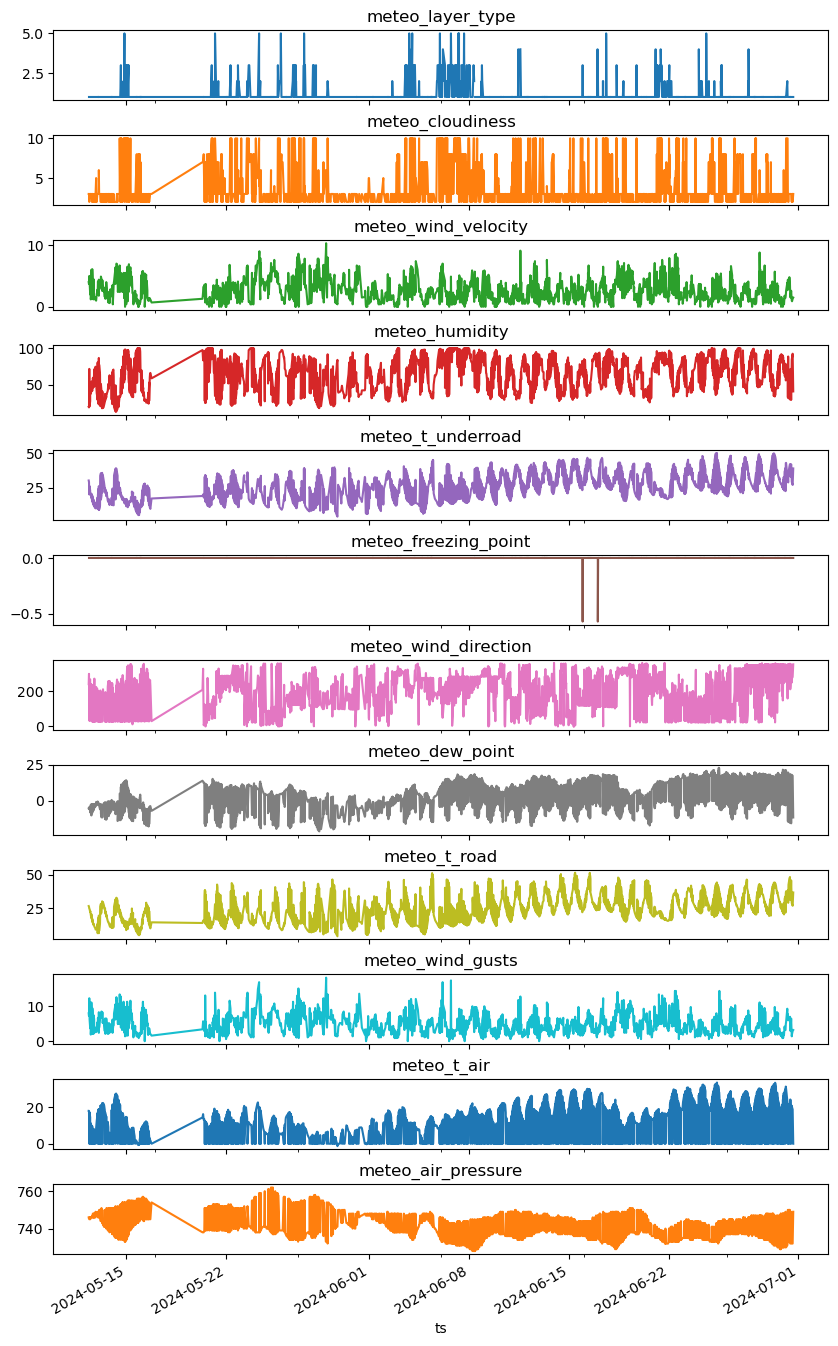

In [6]:
axes = X_train_dated.plot(
    figsize=(10, 18),
    subplots=True,
    layout=(12, 1),
    title=list(X_train_dated.columns),
    legend=False,
)
plt.subplots_adjust(hspace=0.5)

In [7]:
def outside_iqr(x: pd.Series) -> pd.Series[int]:
    q1, q3 = x.quantile(0.25), x.quantile(0.75)
    iqr = q3 - q1
    low, high = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return ((x < low) | (high < x)).fillna(True).astype(int)

In [8]:
def test_filter(df: pd.DataFrame, filter_fn: T.Callable[[pd.Series], pd.Series[int]]):
    print(f"{filter_fn.__name__}:")
    counts = {}
    for name, series in df.items():
        series = series.dropna()
        res = filter_fn(series)
        filtered = (res == 1).sum()
        counts[name] = filtered
    return counts

def print_test_results(counts: dict[str, int]):
    max_name_len = max(map(len, counts.keys()))
    max_count_len = max(map(len, map(str, counts.values())))
    for name, filtered in counts.items():
        print(f"\t{name: <{max_name_len + 4}}{filtered = : >{max_count_len}}")
        
iqr_counts = test_filter(X_train.drop(["ts"], axis=1), outside_iqr)

print_test_results(iqr_counts)

outside_iqr:
	meteo_layer_type        filtered = 211
	meteo_cloudiness        filtered = 417
	meteo_wind_velocity     filtered =  29
	meteo_humidity          filtered =   0
	meteo_t_underroad       filtered =   0
	meteo_freezing_point    filtered =   2
	meteo_wind_direction    filtered =   0
	meteo_dew_point         filtered =   0
	meteo_t_road            filtered =   0
	meteo_wind_gusts        filtered =  30
	meteo_t_air             filtered =   0
	meteo_air_pressure      filtered =   0


outside_iqr:
	meteo_layer_type        filtered = 211
	meteo_cloudiness        filtered = 417
	meteo_wind_velocity     filtered =  29
	meteo_humidity          filtered =   0
	meteo_t_underroad       filtered =   0
	meteo_freezing_point    filtered =   2
	meteo_wind_direction    filtered =   0
	meteo_dew_point         filtered =   0
	meteo_t_road            filtered =   0
	meteo_wind_gusts        filtered =  30
	meteo_t_air             filtered =   0
	meteo_air_pressure      filtered =   0


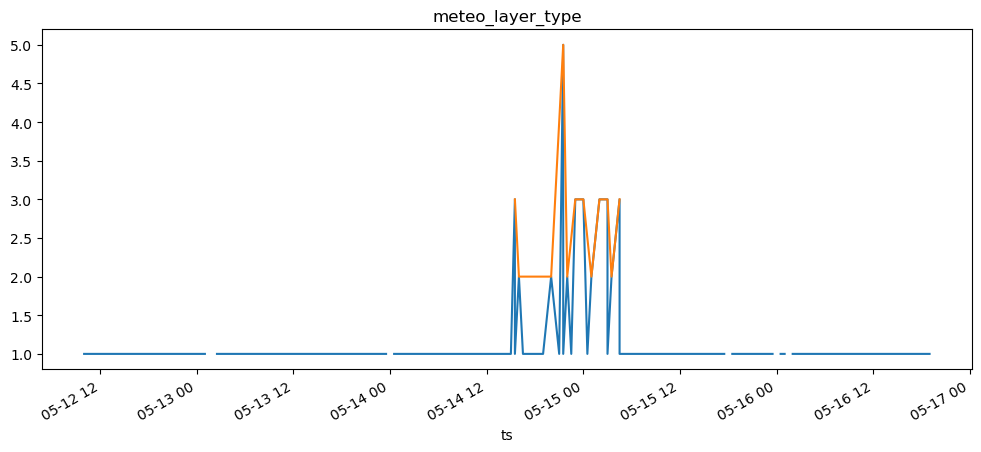

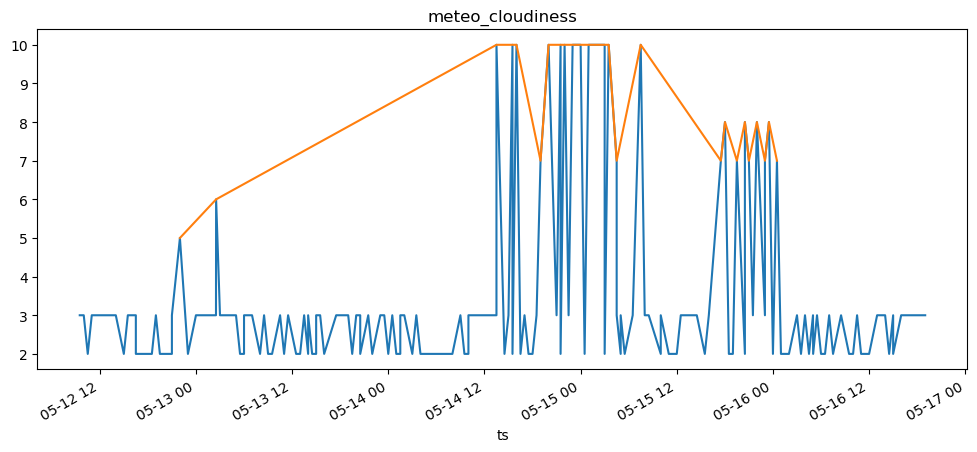

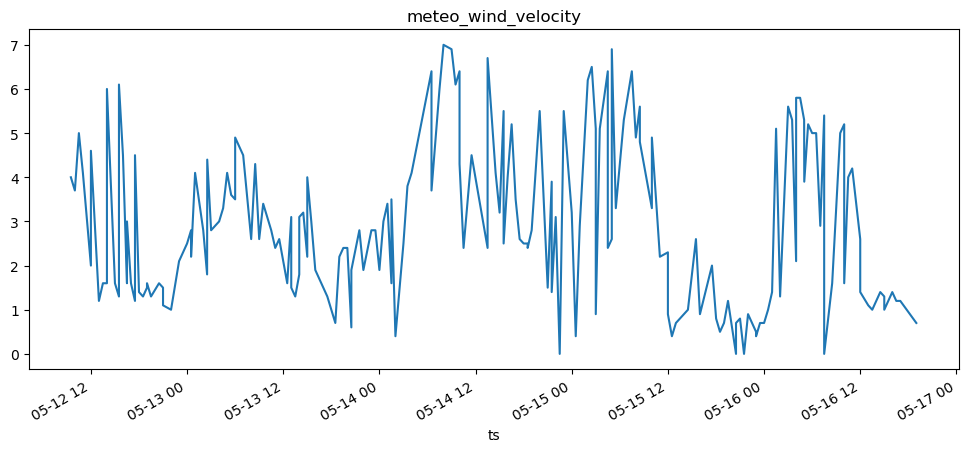

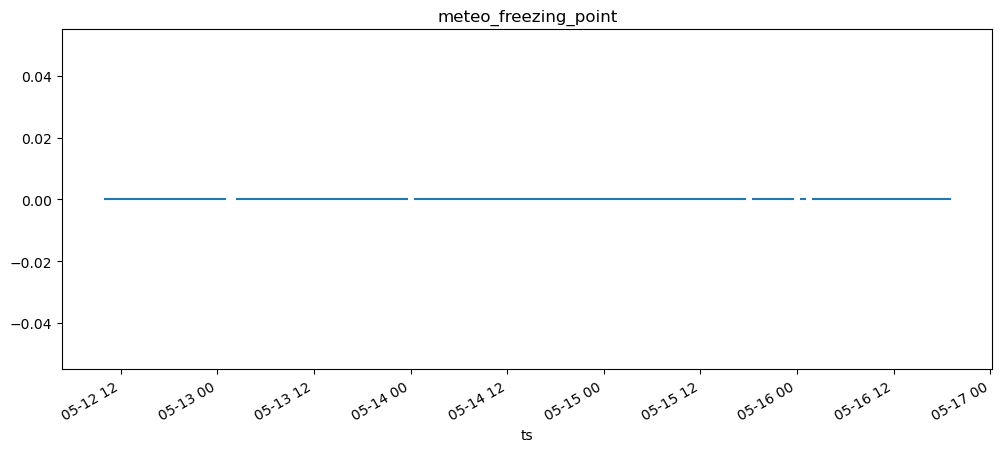

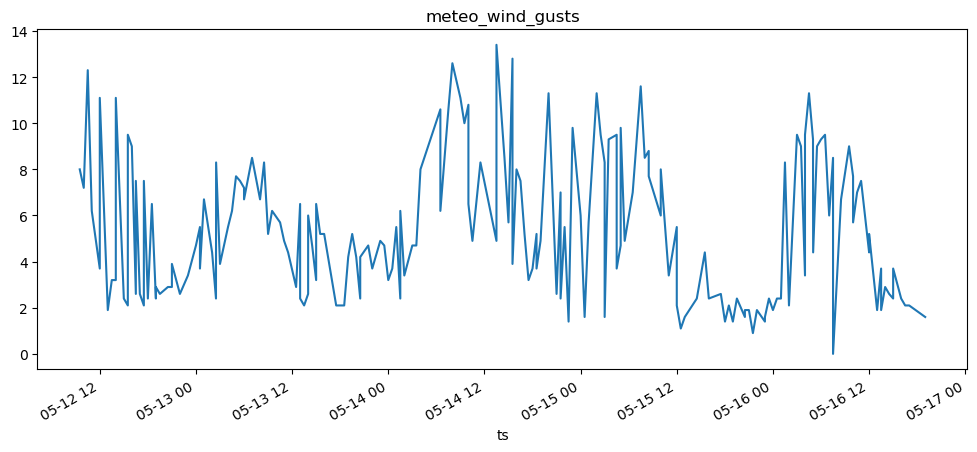

In [9]:
results = test_filter(X_train.drop(["ts"], axis=1), outside_iqr)

print_test_results(results)

candidates = [name for name, count in iqr_counts.items() if count > 0]

df = X_train_dated["2024-05-12":"2024-05-18"]

for name in candidates:
    pd.concat([
        df[[name]], 
        df[name][
            outside_iqr(df[name]) == 1
        ].rename("filtered")
    ]).plot(
        figsize=(12, 5),
        title=name,
        legend=False,
    )

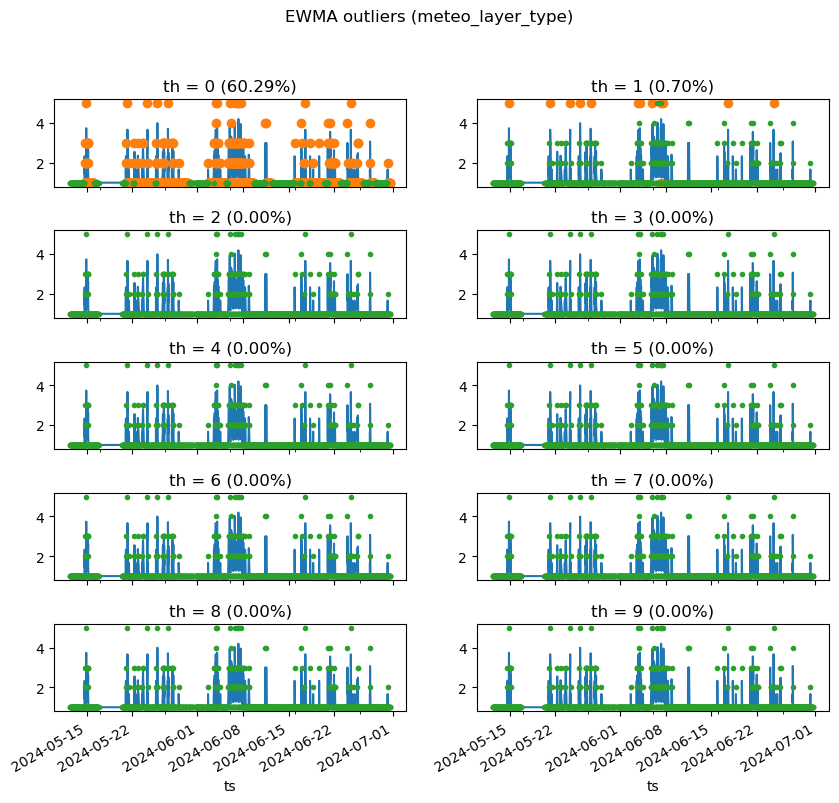

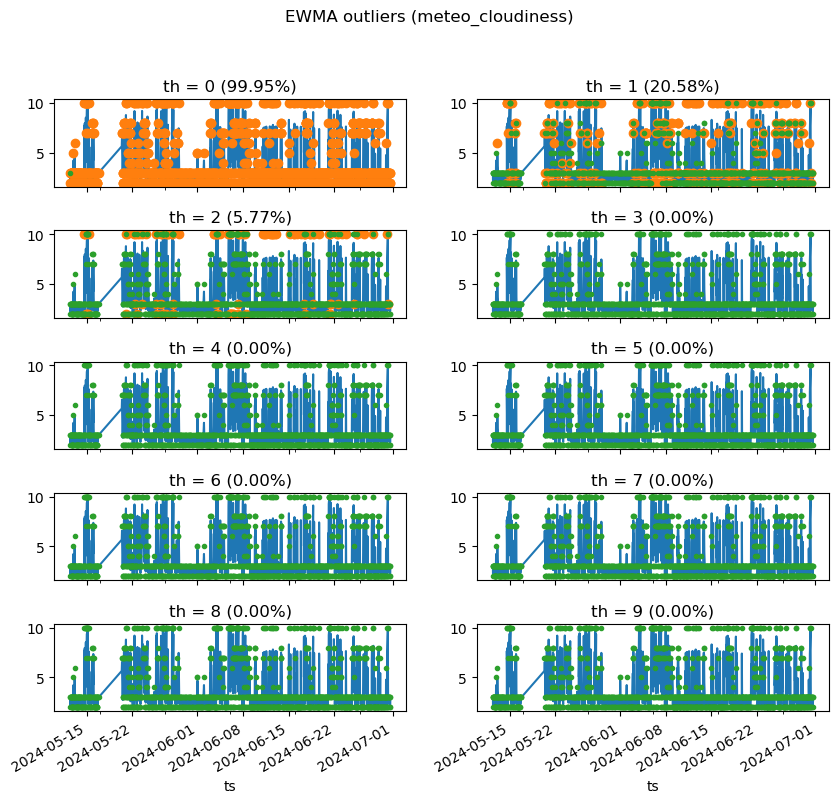

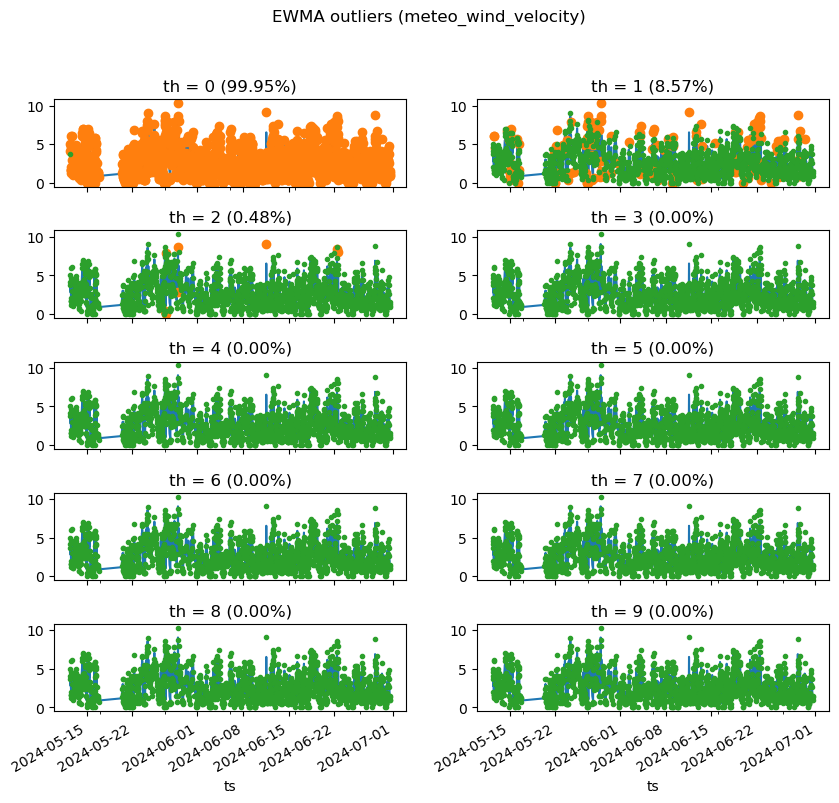

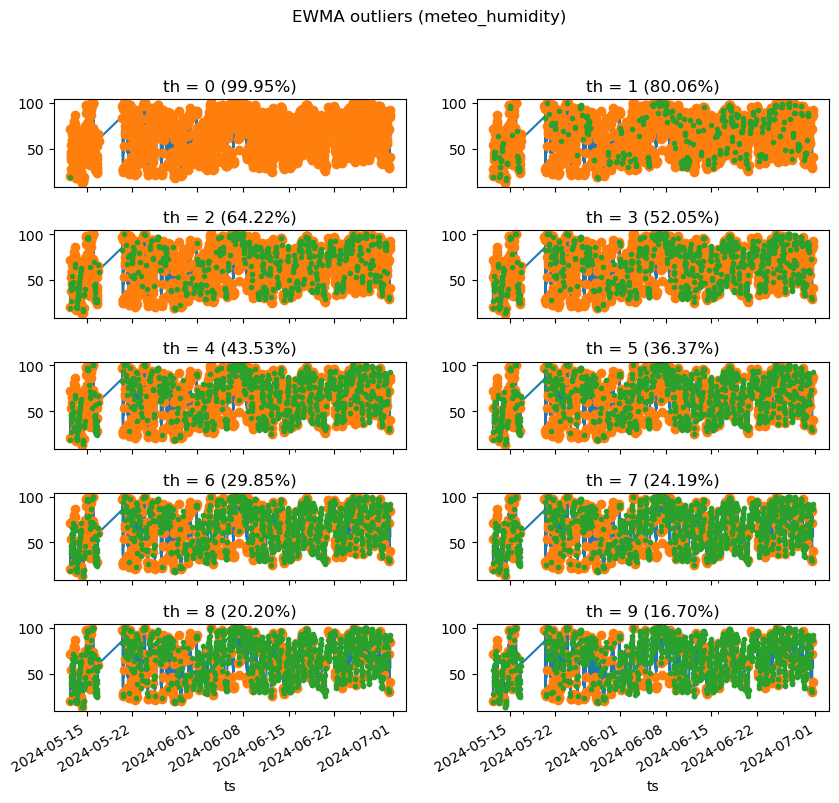

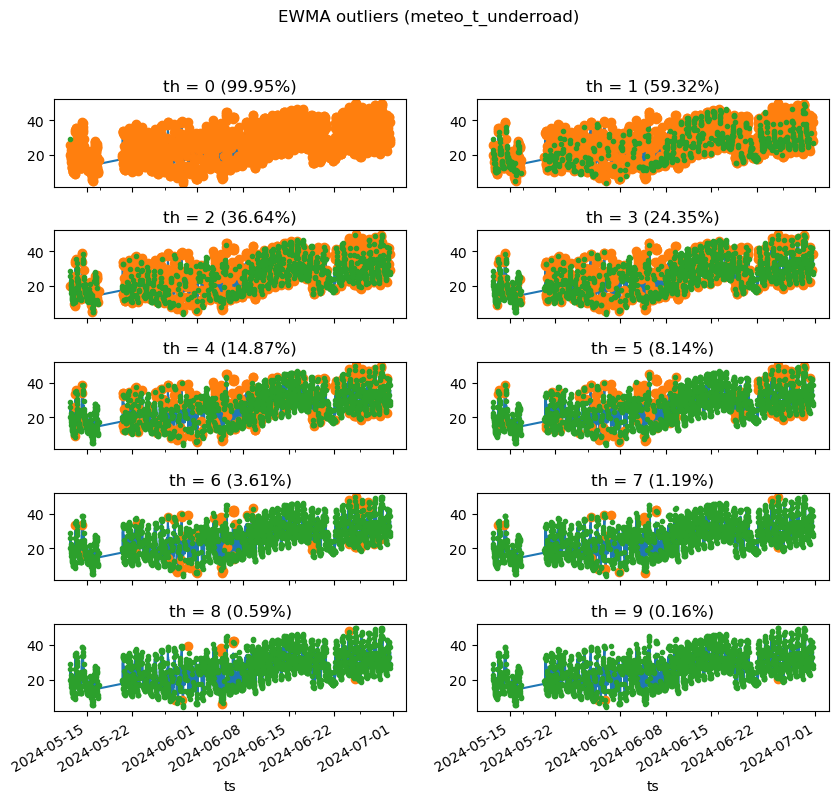

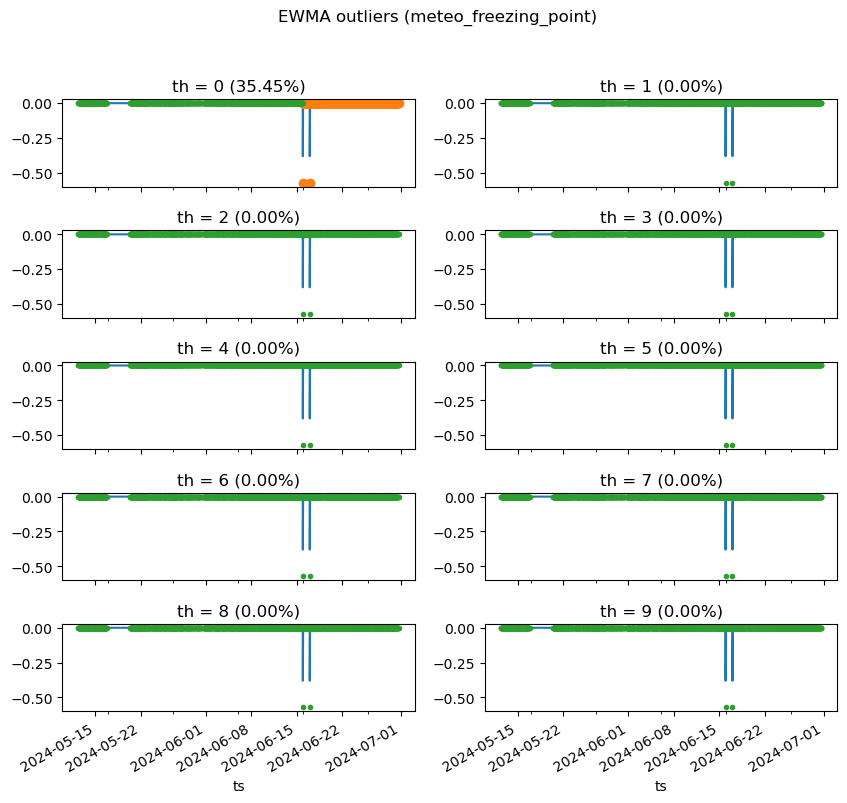

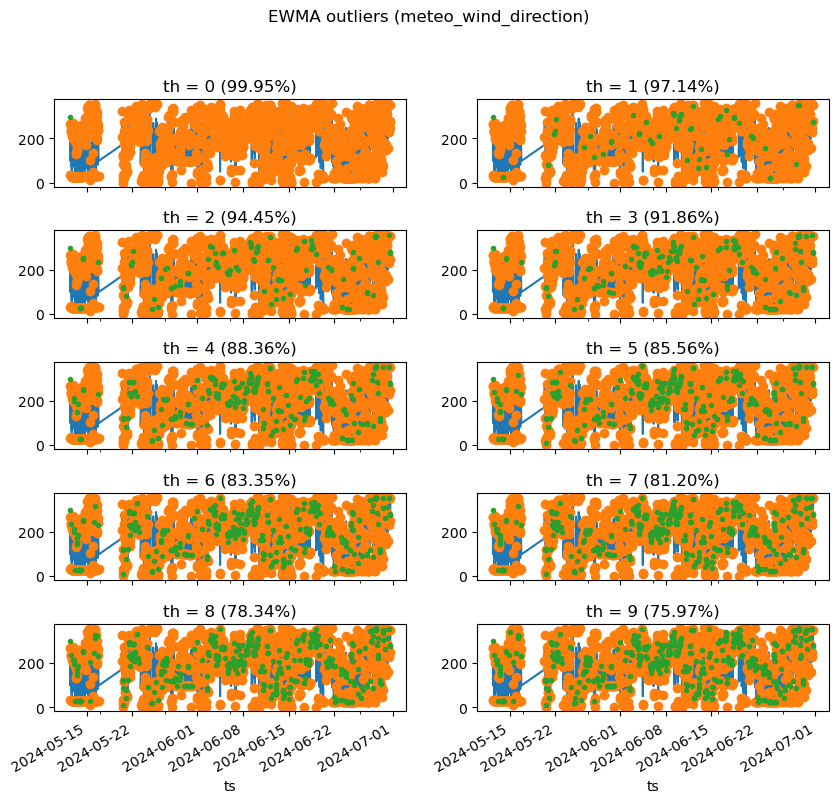

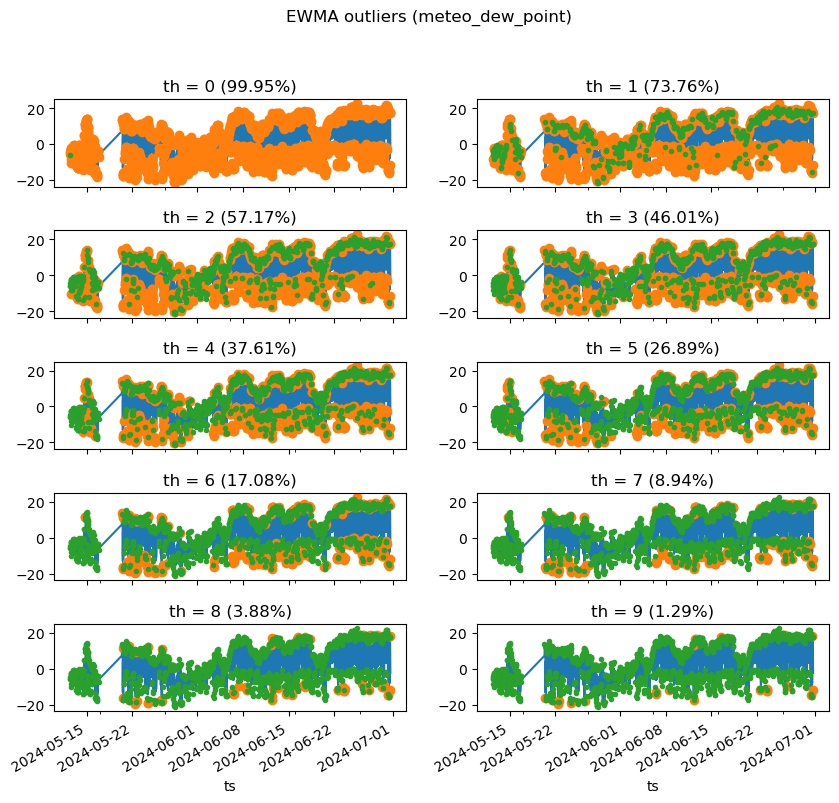

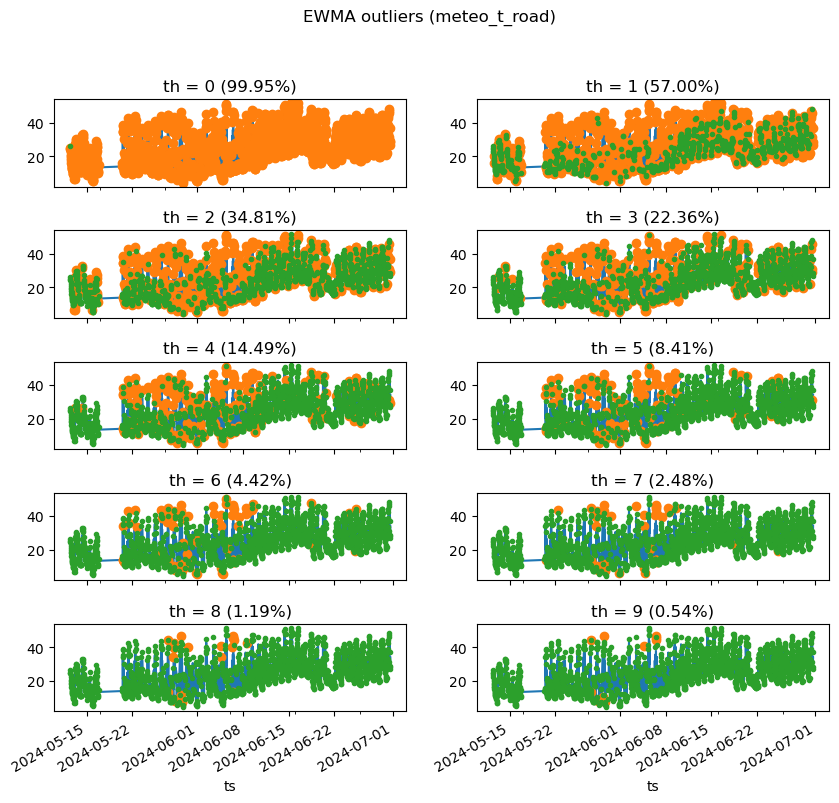

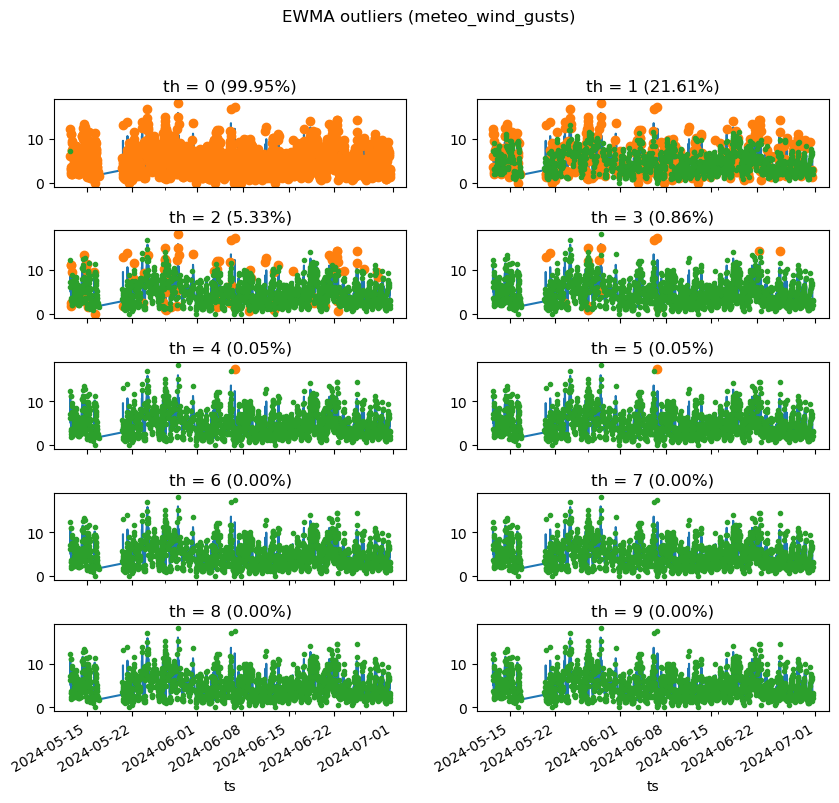

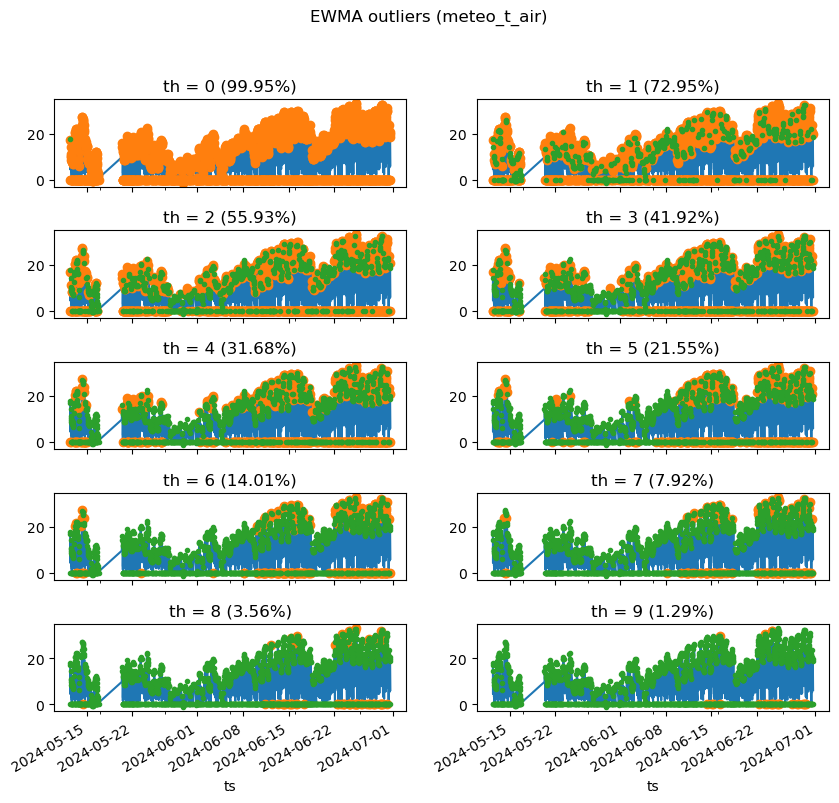

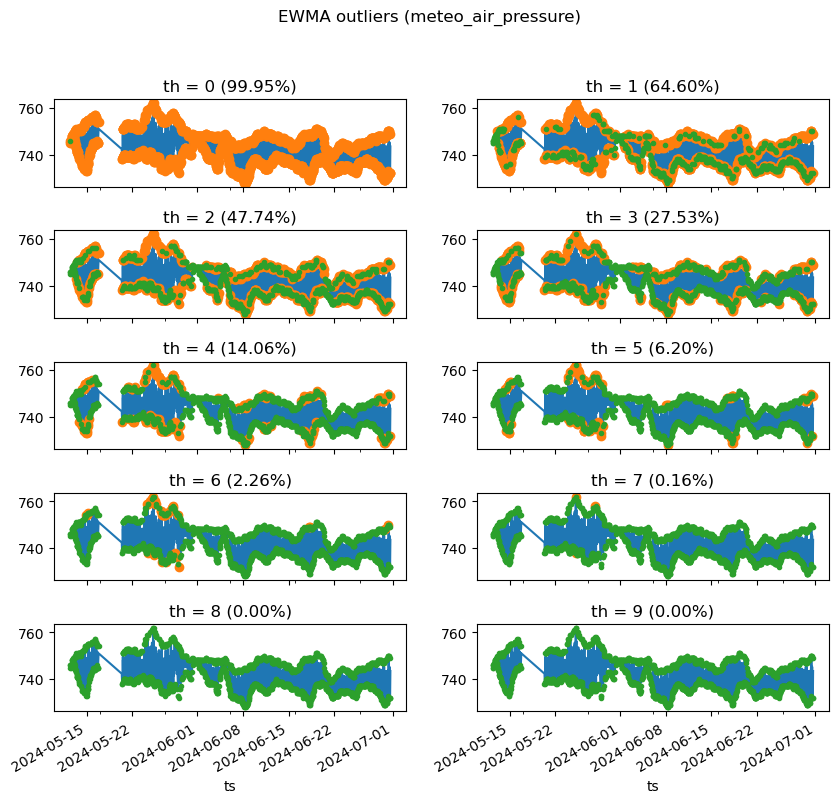

In [10]:
out_dir = Path("out/ewma-outliers")
out_dir.mkdir(exist_ok=True, parents=True)

for name, series in X_train_dated.dropna().items():
    if name in ["id", "ts"]:
        continue

    fig, axes = plt.subplots(5, 2, sharex="col")
    for th, ax in enumerate(axes.flat):
        ewma = series.ewm(span=2).mean().rename("ewma")
        outliers = series.sub(ewma).abs().gt(th)
        ewma.plot(ax=ax)
        s_o = series[outliers].rename("outliers")
        s_i = series[~outliers].rename("inliers")
        s_o.plot(ax=ax, style="o")
        s_i.plot(ax=ax, style=".")
        ax.set_title(f"{th = } ({len(s_o)/len(series)*100:.2f}%)")
    fig.suptitle(f"EWMA outliers ({name})")
    fig.subplots_adjust(hspace=0.5)
    fig.set_size_inches(10, 9)
    fig.savefig(out_dir / f"{name}.png")

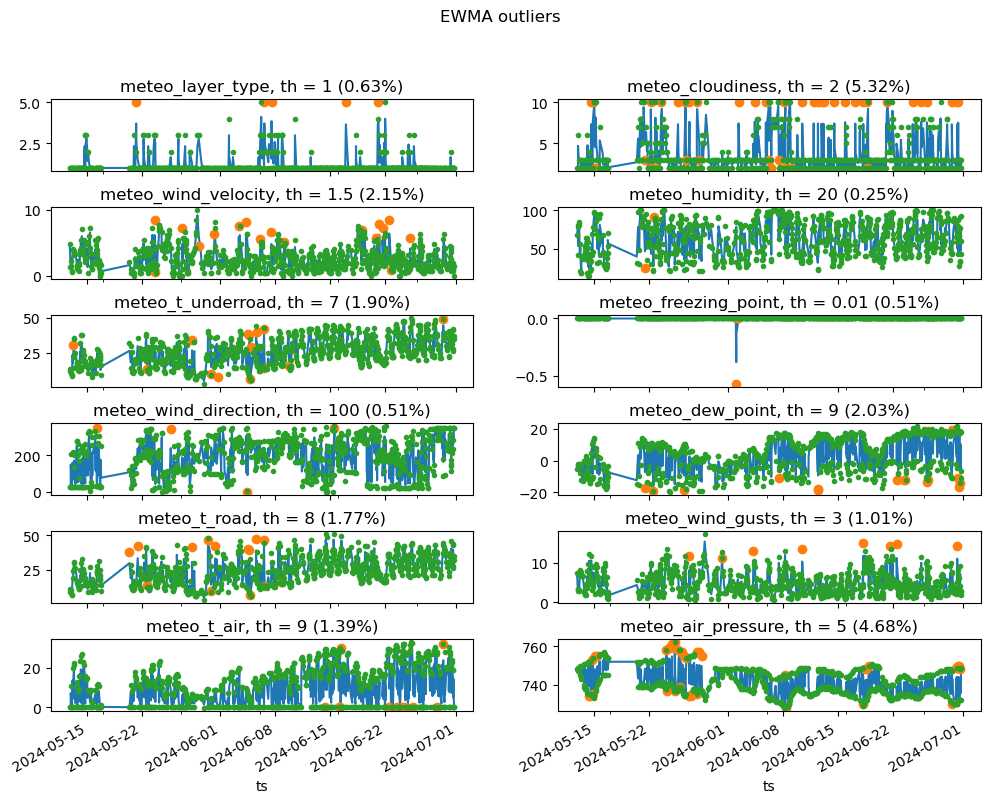

In [11]:
class EWMAParams(T.TypedDict):
    th: float
    span: T.NotRequired[float]
    com: T.NotRequired[float]
    alpha: T.NotRequired[float]

# подбиралось руками =)
EWMA_PARAMS: dict[str, EWMAParams] = {
    "meteo_air_pressure": {"th": 5, "span": 2},
    "meteo_cloudiness": {"th": 2, "span": 2},
    "meteo_dew_point": {"th": 9, "span": 2},
    "meteo_freezing_point": {"th": 0.01, "span": 2},
    "meteo_humidity": {"th": 20, "span": 2},
    "meteo_layer_type": {"th": 1, "span": 2},
    "meteo_t_air": {"th": 9, "span": 2},
    "meteo_t_road": {"th": 8, "span": 2},
    "meteo_t_underroad": {"th": 7, "span": 2},
    "meteo_wind_direction": {"th": 100, "span": 2},
    "meteo_wind_gusts": {"th": 3, "span": 2},
    "meteo_wind_velocity": {"th": 1.5, "span": 2},
}

df = X_test.set_index("ts").sort_index()
fig, axes = plt.subplots(6, 2, sharex="col")
axes_iter = iter(axes.flat)
for name, series in df.dropna().items():
    if name in ["id", "ts"]:
        continue
    ax = next(axes_iter)
    p = EWMA_PARAMS[str(name)].copy()
    th = p.pop("th")
    ewma = series.ewm(**p).mean().rename("ewma")
    outliers = series.sub(ewma).abs().gt(th)
    ewma.plot(ax=ax)
    s_o = series[outliers].rename("outliers")
    s_i = series[~outliers].rename("inliers")
    s_o.plot(ax=ax, style="o")
    s_i.plot(ax=ax, style=".")
    ax.set_title(f"{name}, {th = } ({len(s_o)/len(series)*100:.2f}%)")

fig.suptitle(f"EWMA outliers")
fig.subplots_adjust(hspace=0.5)
fig.set_size_inches(12, 9)

In [12]:
def generate_targets_csv(df: pd.DataFrame, file: str):
    cols = []
    df = df.sort_values("ts")
    results = df.copy()
    for name, series in df.items():
        if name in ["id", "ts"]:
            continue
        p = EWMA_PARAMS[str(name)].copy()
        th = p.pop("th")
        ewma = series.ewm(**p).mean().rename("ewma")
        outliers = series.sub(ewma).abs().gt(th)
        col = f"a{len(cols)}"
        cols.append(col)
        results=results.assign(**{col: outliers.fillna(True).astype(int).values})

    results["target"] = results[cols].agg(lambda x: '[%s]' % ', '.join(map(str, x)), axis=1)
    results["target"].to_csv(file)

In [13]:
generate_targets_csv(X_test, "out/targets-test.csv")